In [1]:
import pandas as pd
pd.set_option("display.max_columns", 159)
pd.set_option("display.max_rows", 159)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Functions

In [2]:
def generate_hours_minutes(is_ampm: bool = False) -> list:
    hours_minutes = []

    for hour in range(24):  # 24 hours in a day
        for minute in range(60):  # 60 minutes in an hour
            if is_ampm:
                if hour < 12:
                    if hour == 0:
                        hours_minutes.append(f"{12}:{minute:02d} AM")
                    else:
                        hours_minutes.append(f"{hour}:{minute:02d} AM")
                else:
                    if hour == 12:
                        hours_minutes.append(f"{hour}:{minute:02d} PM")
                    else:
                        hours_minutes.append(f"{hour%12}:{minute:02d} PM")
            else:
                hours_minutes.append(f"{hour:02d}:{minute:02d}")

    return hours_minutes

# Validating (hour : minute) generation in 24h/12h format:

In [3]:
# Generating the 24 hrs format
_24h_format = generate_hours_minutes()

# Generating AM/PM format
_12h_format = generate_hours_minutes(is_ampm=True)

print(_24h_format)
print(_12h_format)


['00:00', '00:01', '00:02', '00:03', '00:04', '00:05', '00:06', '00:07', '00:08', '00:09', '00:10', '00:11', '00:12', '00:13', '00:14', '00:15', '00:16', '00:17', '00:18', '00:19', '00:20', '00:21', '00:22', '00:23', '00:24', '00:25', '00:26', '00:27', '00:28', '00:29', '00:30', '00:31', '00:32', '00:33', '00:34', '00:35', '00:36', '00:37', '00:38', '00:39', '00:40', '00:41', '00:42', '00:43', '00:44', '00:45', '00:46', '00:47', '00:48', '00:49', '00:50', '00:51', '00:52', '00:53', '00:54', '00:55', '00:56', '00:57', '00:58', '00:59', '01:00', '01:01', '01:02', '01:03', '01:04', '01:05', '01:06', '01:07', '01:08', '01:09', '01:10', '01:11', '01:12', '01:13', '01:14', '01:15', '01:16', '01:17', '01:18', '01:19', '01:20', '01:21', '01:22', '01:23', '01:24', '01:25', '01:26', '01:27', '01:28', '01:29', '01:30', '01:31', '01:32', '01:33', '01:34', '01:35', '01:36', '01:37', '01:38', '01:39', '01:40', '01:41', '01:42', '01:43', '01:44', '01:45', '01:46', '01:47', '01:48', '01:49', '01:50', 

# Creating a Dataframe to validate conditions:

In [4]:
# Setting all the information in a dataframe
fr = pd.DataFrame({'format24' : _24h_format, 
                   'format24_r' : [hm[::-1].replace(':','') for hm in _24h_format], 
                   'format12_' : _12h_format})

#applying some data cleaning to the 12h format column and adding the reverse
fr = (fr
        .assign(
            meridian=fr.format12_.str.split(' ', expand=True)[1],
            format12=fr.format12_.str.split(' ', expand=True)[0]
        )
        .assign(format12_r= lambda _df: _df.format12.apply(lambda x: x[::-1].replace(':','')))
        .drop(columns=['format12_'])
      )

fr

,format24,format24_r,meridian,format12,format12_r
0,00:00,0000,AM,12:00,0021
1,00:01,1000,AM,12:01,1021
2,00:02,2000,AM,12:02,2021
3,00:03,3000,AM,12:03,3021
4,00:04,4000,AM,12:04,4021
...,...,...,...,...,...
1435,23:55,5532,PM,11:55,5511
1436,23:56,6532,PM,11:56,6511
1437,23:57,7532,PM,11:57,7511
1438,23:58,8532,PM,11:58,8511


In [5]:
# Adding column to validate palindrome feature:

fr = (fr.assign(
                # We remove the ":" from the string to properly validate the palindrome condition in both formats
                **{ 'palindrome' + Hrformat : ( ( fr['format' + Hrformat].str.replace(':', '') ) == ( fr['format' + Hrformat + '_r'] ) )*1 for Hrformat in ['24', '12'] } 
            )
        .assign( Different_24vs12 = (fr['format24'] != fr['format12'])*1 ) # Adding the condition that (24 vs 12) formats are different
    )

fr

,format24,format24_r,meridian,format12,format12_r,palindrome24,palindrome12,Different_24vs12
0,00:00,0000,AM,12:00,0021,1,0,1
1,00:01,1000,AM,12:01,1021,0,0,1
2,00:02,2000,AM,12:02,2021,0,0,1
3,00:03,3000,AM,12:03,3021,0,0,1
4,00:04,4000,AM,12:04,4021,0,0,1
...,...,...,...,...,...,...,...,...
1435,23:55,5532,PM,11:55,5511,0,0,1
1436,23:56,6532,PM,11:56,6511,0,0,1
1437,23:57,7532,PM,11:57,7511,0,0,1
1438,23:58,8532,PM,11:58,8511,0,0,1


In [6]:
fr.query("(palindrome24 == 1) and (palindrome12 == 1) and (Different_24vs12 == 1)") # Hour of the day that follows all conditions.

,format24,format24_r,meridian,format12,format12_r,palindrome24,palindrome12,Different_24vs12
811,13:31,1331,PM,1:31,131,1,1,1


# Creating Plot

In [7]:
# Basic transformation

dfplot = \
            (fr
                [['format24', 'format12', 'meridian', 'palindrome24', 'palindrome12']]
                .assign( Name = np.select( [(fr['palindrome24'] == 1) & (fr['palindrome12'] == 1), fr['palindrome24'] == 1, fr['palindrome12'] == 1],
                                           [( fr['format24'] + ' H | ' + fr['format12'] + ' ' + fr['meridian'] ), (fr['format24'] + ' H'), (fr['format12'] + ' ' + fr['meridian'])] ) )  #'24H: ' fr['format24'] + ' - 12H:' + fr['format12'] + ' ' + fr['meridian']
                .set_index('Name')
                .stack()
                .to_frame()
                .reset_index(level=1)
                .rename(columns={0:'Value', 'level_1':'Conditions'})
                .query("Value == 1")
                .reset_index()
                .groupby(by=['Name'])
                .sum()
                .reset_index()
            )

dfplot.head()

,Name,Conditions,Value
0,00:00 H,palindrome24,1
1,01:10 H,palindrome24,1
2,02:20 H,palindrome24,1
3,03:30 H,palindrome24,1
4,04:40 H,palindrome24,1


In [8]:
# Visual Transformation (Adding the 24h format to sort the by a time sequence sense)
dfplot = (dfplot
                .assign( 
                    time = dfplot['Name'].str.split(' H|AM|PM', expand=True)[0],
                    type = np.select([ dfplot['Name'].str.contains(' H'), dfplot['Name'].str.contains('AM'), dfplot['Name'].str.contains('PM') ], ['H', 'AM', 'PM'] ) 
                )
                .pipe( lambda _df: _df.assign( hour = _df['time'].str.split(':', expand=True)[0].astype(int) ) ) #getting the hour
                .pipe( lambda _df: _df.assign( hour24 = np.where( _df.type == 'PM', _df.hour+12, _df.hour ) ) ) # adding 12 when PM
                .pipe( lambda _df: _df.assign( hour244 = np.where( _df.hour24.astype(str).str.len() == 1 , '0' + _df.hour24.astype(str), _df.hour ) ) ) # adding initial 0 when morning hours to the 24h format (helper column)
                .pipe( lambda _df: _df.assign( time24 = np.select( [(_df.type == 'AM'), (_df.type == 'PM')], 
                                                                [_df.hour244.astype(str) + ':' +_df['time'].str.split(':', expand=True)[1], _df.hour24.astype(str) + ':' +_df['time'].str.split(':', expand=True)[1]], default=_df.time ) ) ) # Final 24h format for sorting
                .sort_values(by = ['time24'], ascending=True) # Sorting by 24h format
                .pipe( lambda _df: _df.assign( DecHour = _df['hour24'] + round( _df['time'].str.split(':', expand=True)[1].astype(int).div(60) ,2) ) ) # Adding decimal hour for radial plot
                .pipe( lambda _df: _df.assign( angle = _df['DecHour'].mul(2*np.pi).div(24) ) ) # Radians Hours
                .pipe( lambda _df: _df.assign( plotlabels = np.select([ (_df['Conditions'].str.contains('12')) & (_df['Conditions'].str.contains('24')) & (_df['hour244'] == 13),
                                                                         (_df['Conditions'].str.contains('12')) & (_df['Conditions'].str.contains('24')),
                                                                         (_df['Conditions'].str.contains('12')), 
                                                                         (_df['Conditions'].str.contains('24')) ],
                                                                       [ 'Palindrome AM|PM|24h and different format', 'Palindrome AM|PM|24h', 'Palindrome AM|PM', 'Palindrome 24h' ] 
                                                                       ) ) )# Palindrome Categories
                .pipe( lambda _df: _df.assign( radialColor = np.select([ _df['plotlabels'] == 'Palindrome AM|PM|24h and different format', 
                                                                         _df['plotlabels'] == 'Palindrome AM|PM|24h', 
                                                                         _df['plotlabels'] == 'Palindrome AM|PM', 
                                                                         _df['plotlabels'] == 'Palindrome 24h' ],
                                                                       [ '#FE0000', '#557A46', '#7A9D54', '#8C3333' ] ) ) ) # Round plot colors
                .drop(columns=['time', 'hour', 'hour24', 'hour244']) # Dropping extra columns
            )

dfplot.head()

,Name,Conditions,Value,type,time24,DecHour,angle,plotlabels,radialColor
0,00:00 H,palindrome24,1,H,00:00,0.00,0.000000,Palindrome 24h,#8C3333
15,1:01 AM,palindrome12,1,AM,01:01,1.02,0.267035,Palindrome AM|PM,#7A9D54
1,01:10 H,palindrome24,1,H,01:10,1.17,0.306305,Palindrome 24h,#8C3333
17,1:11 AM,palindrome12,1,AM,01:11,1.18,0.308923,Palindrome AM|PM,#7A9D54
19,1:21 AM,palindrome12,1,AM,01:21,1.35,0.353429,Palindrome AM|PM,#7A9D54


C:\Users\maike\AppData\Local\Temp\ipykernel_20240\2999673443.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  .str.replace('AM|PM', 'AM | PM')


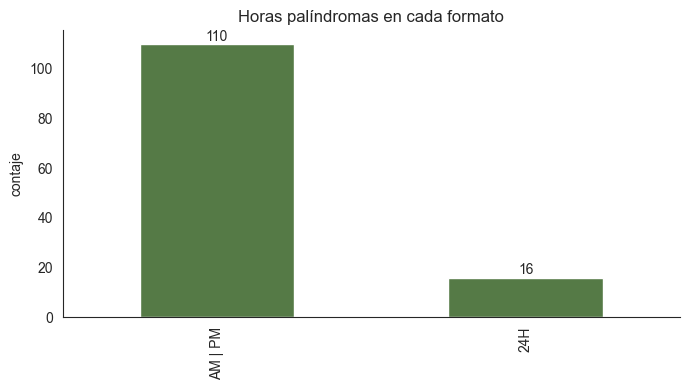

In [13]:
sns.set_style("white")

#plt.title('Palindrome hours in each format')
plt.title('Horas palíndromas en cada formato')

barfr = (dfplot
                .type
                .str.replace('H', '24H')
                .str.replace('AM|PM', 'AM | PM')
                .value_counts()
                )

ax = (barfr
        .plot
        .bar(color='#557A46', figsize=(7,4))
        )

# Add the values on top of each bar
for i, v in enumerate(barfr.values):
    ax.text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=10)

#plt.ylabel('count')
plt.ylabel('contaje')

sns.despine(top=True, right=True)

plt.tight_layout()
plt.savefig('quick_barplot_ES.png', transparent=True, dpi=300)

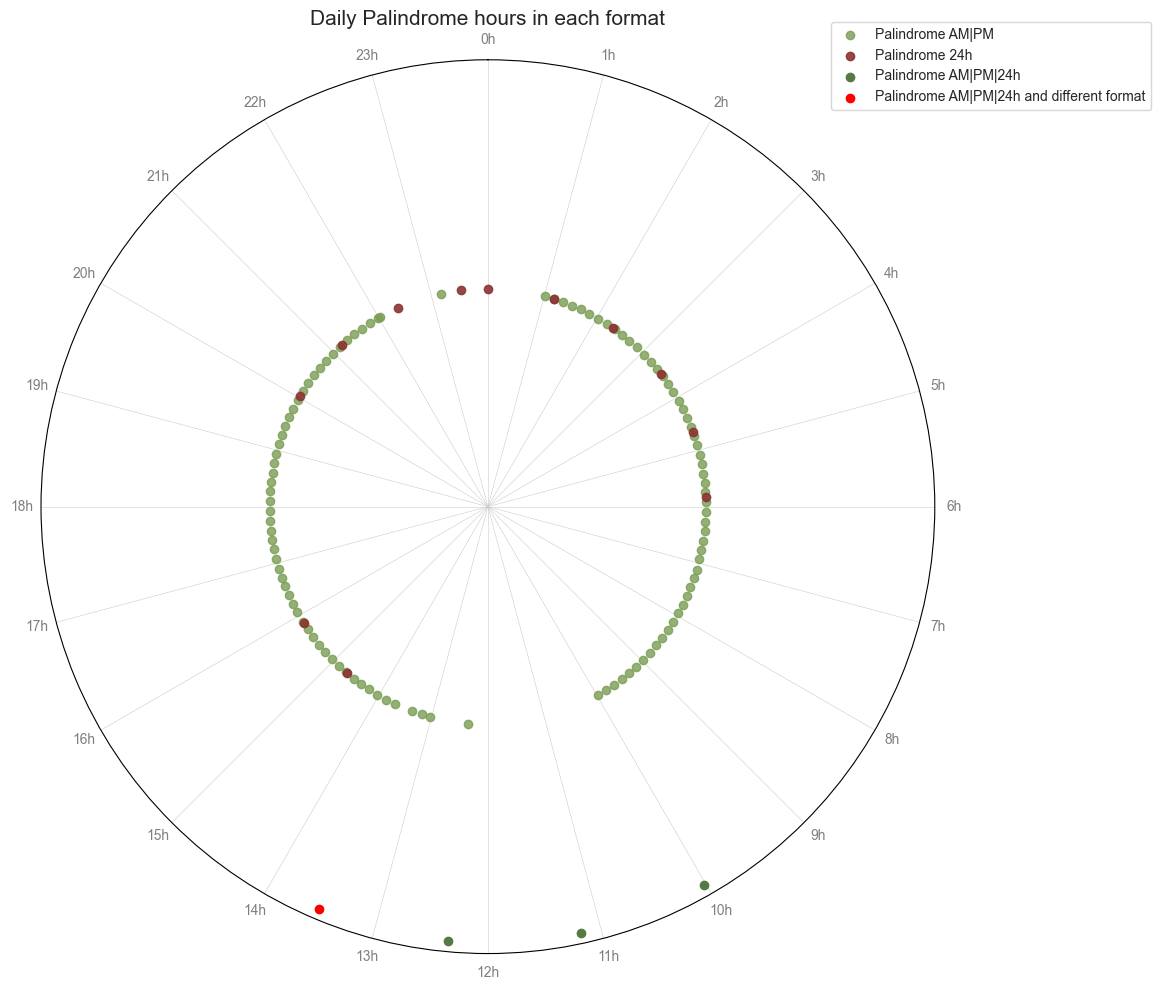

In [14]:
sns.set_style("whitegrid")

plt.figure(figsize=(20,10))

ax = plt.subplot(111, polar=True)
#ax.scatter(dfplot['angle'], dfplot['Value'], c=dfplot['radialColor'] )

for category in ['Palindrome AM|PM', 'Palindrome 24h', 'Palindrome AM|PM|24h', 'Palindrome AM|PM|24h and different format']:
    # Frame filtering
    df_category = dfplot[dfplot['plotlabels'] == category]
    # Visual Components
    COLOR = df_category.iloc[0,-1]
    _alpha = 0.8 if (COLOR == '#7A9D54') else (0.9 if COLOR == '#8C3333' else 1 )

    # add to figure
    ax.scatter(df_category['angle'], df_category['Value'], label=category, c=COLOR, alpha=_alpha)

# suppress the radial labels
plt.setp(ax.get_yticklabels(), visible=False)

# set the circumference labels
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
ax.set_xticklabels([str(h) + 'h' for h in range(24)], color='gray')

# make the labels go clockwise
ax.set_theta_direction(-1)

# place 0 at the top
ax.set_theta_offset(np.pi/2.0)

# set the circumference color
ax.spines['polar'].set_edgecolor('black')

# Personalized radial lines
ax.yaxis.grid(linewidth=0)
ax.xaxis.grid(linewidth=0.4)

plt.title("Daily Palindrome hours in each format", fontsize=15)

ax.legend(bbox_to_anchor=(1.25, 1.05))

plt.tight_layout()
plt.savefig('circle_hours_EN.png', transparent=True, dpi=300)

plt.show()

In [18]:
#import dataframe_image as dfi
frtable = \
                (
                    dfplot[['Name']]
                            .assign(
                                Palindrome_12 = np.where( dfplot['Name'].str.contains('AM|PM'), "👍", ""),
                                Palindrome_24 = np.where( dfplot['Name'].str.contains('H'), "👍", ""),
                                Diff_Palindrome = np.where( dfplot['Name'].astype(str).str.contains('13:31'), "❤️🏆❤️", "" )                
                    )
                    .set_index('Name')
                )

#dfi.export(frtable, "Emoji Table.png", table_conversion='selenium')

frtable

,Palindrome_12,Palindrome_24,Diff_Palindrome
Name,,,
00:00 H,,👍,
1:01 AM,👍,,
01:10 H,,👍,
1:11 AM,👍,,
1:21 AM,👍,,
1:31 AM,👍,,
1:41 AM,👍,,
1:51 AM,👍,,
2:02 AM,👍,,


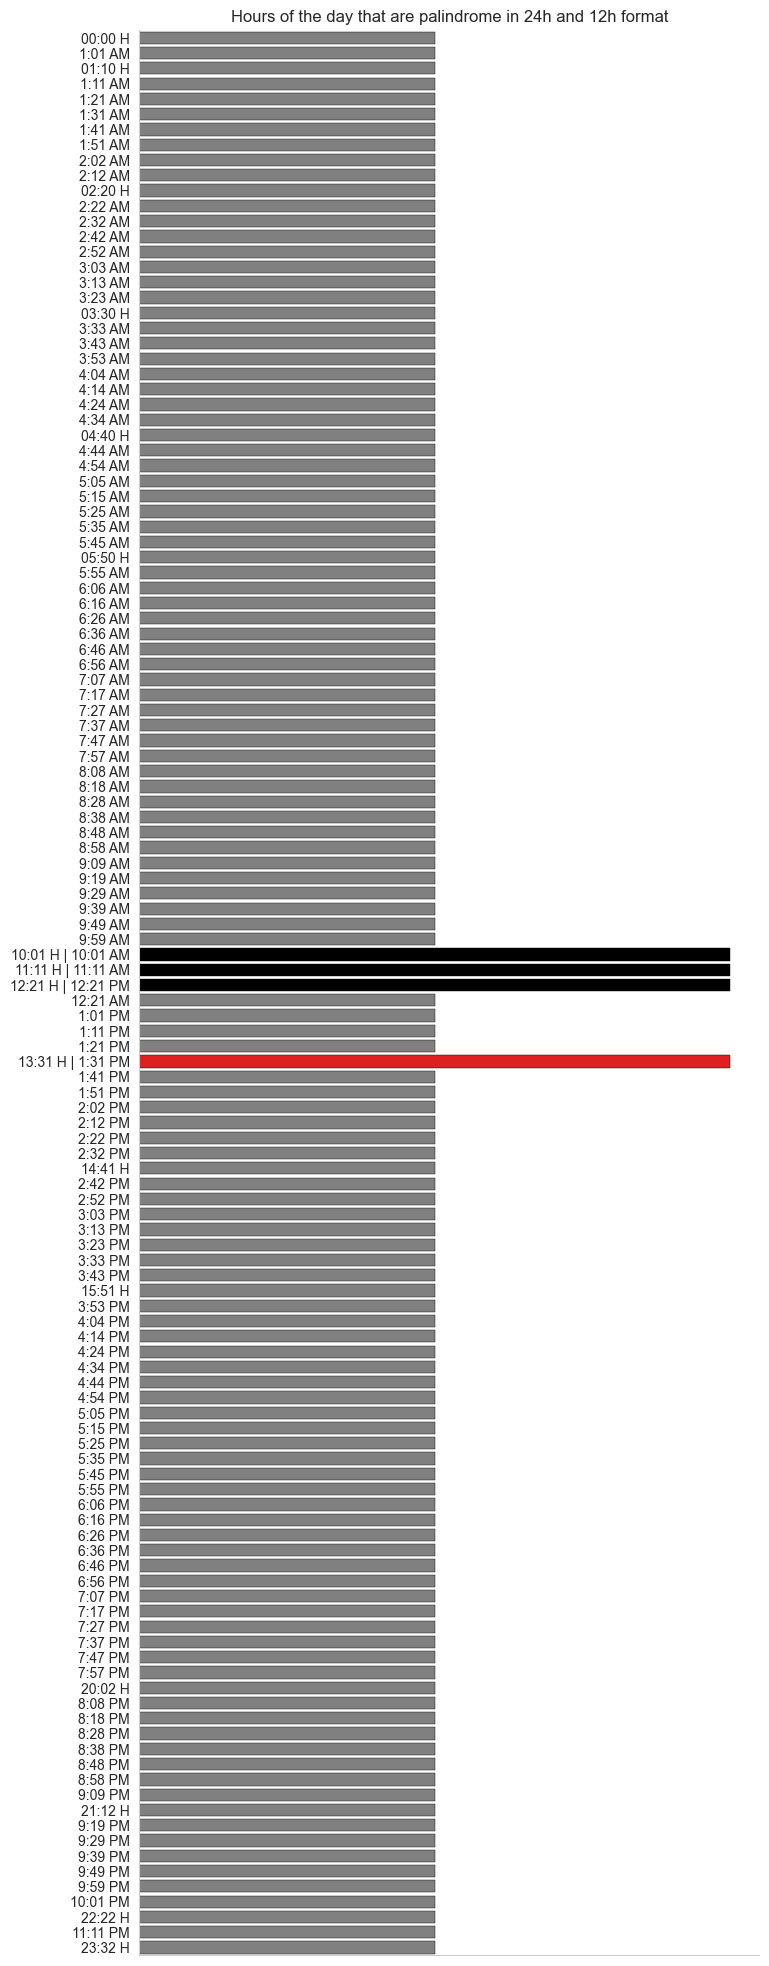

In [107]:
plt.figure(figsize=(8,25))

sns.set_style("whitegrid")  # Set grid style

plt.title('Hours of the day that are palindrome in 24h and 12h format')

# Specify the categories you want to highlight
highlight_categories = ["10:01 H | 10:01 AM", "11:11 H | 11:11 AM", "12:21 H | 12:21 PM"]  # Change these to your chosen categories

# Prepare a color palette
palette = {category: 'black' if category in highlight_categories else 
                      ('red' if category=='13:31 H | 1:31 PM' else 'grey') 
           for category in dfplot['Name'].unique()}

ax = sns.barplot(data=dfplot, y="Name", x="Value", orient='h', palette=palette, edgecolor='black', linewidth=0.3) #, hue='Conditions'

ax.set_xticks([])
ax.set_ylabel('', fontsize=15)
ax.set_xlabel('')

sns.despine(top=True, right=True)

plt.show()